In [5]:
#####
# Script: Giovanni Tognini Bonelli Sinclair
# Date: 07/12/21
#####

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from collections import defaultdict
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
import itertools
import random
from skimage import measure
from scipy.signal import convolve2d
import math as m

from Localising_GEO_satellites_algorithm import read_annotation_file,read_image, plot_img,random_different_coordinates,extract_neighborhood,check_coordinate_validity, generate_labeled_data,generate_labeled_set;
from Main_algorithm_v2 import Brightness_analysis # ***** Main_algorithm_v2.py needs to be in the same directory as this script for this to work

In [6]:
path1 = 'C:/Users/sincl/OneDrive/Desktop/Cranfield University/spotGEO project/Dataset/train_anno.json'
path2 = 'C:/Users/sincl/OneDrive/Desktop/Cranfield University/spotGEO project/Dataset/train/'
path3 = 'C:/Users/sincl/OneDrive/Desktop/Cranfield University/spotGEO project/Dataset/train/1/5.png'

radius=3
train_annotation=read_annotation_file(path1)

labels, features = generate_labeled_set(train_annotation,path2, range(101,103), radius, 500)

print(labels.shape)
print(labels)
print(features.shape)

ID = 0
ID2 = 3

(5015,)
[0 0 0 ... 0 0 0]
(5015, 49)


In [10]:
false_sats = 0
true_sats = 0

for k in range(len(labels)):
    if labels[k] == 0:
        false_sats += 1
    elif labels[k] == 1:
        true_sats += 1

In [11]:
print(true_sats, '\n', false_sats)

15 
 5000


In [7]:
threshold = np.arange(-0.01,0.017,0.001)
kappa_score = []
threshold_graph = []

for i in range(len(threshold)):
    results = Brightness_analysis.classify(features,labels,ID,ID2,threshold[i])
    print("Kappa =",cohen_kappa_score(results[0],labels))
    kappa_score.append(cohen_kappa_score(results[0],labels))
    threshold_graph.append(threshold[i])

Analysing training dataset...
Kappa = 3.005966844171759e-05
Analysing training dataset...
Kappa = 4.095479273469316e-05
Analysing training dataset...
Kappa = 5.9200825106353605e-05
Analysing training dataset...
Kappa = 9.849535176942315e-05
Analysing training dataset...
Kappa = 0.0001875209727403293
Analysing training dataset...
Kappa = 0.00036818617524381203
Analysing training dataset...
Kappa = 0.0006568638400877846
Analysing training dataset...
Kappa = 0.0011789753216427945
Analysing training dataset...
Kappa = 0.002077860485054095
Analysing training dataset...
Kappa = 0.0035491051474705326
Analysing training dataset...
Kappa = 0.005927595935543706
Analysing training dataset...
Kappa = 0.009821781429936727
Analysing training dataset...
Kappa = 0.017301861541837438
Analysing training dataset...
Kappa = 0.02885315302616087
Analysing training dataset...
Kappa = 0.04851605908659706
Analysing training dataset...
Kappa = 0.07781503753581731
Analysing training dataset...
Kappa = 0.10213143

In [4]:
threshold = 0.012
results = Brightness_analysis.classify(features,labels,ID,ID2,threshold)

Analysing training dataset...


In [5]:
print(classification_report(results[0],labels))
# Threshold = 0.012 seems to be the best

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4970
           1       0.47      0.16      0.23        45

    accuracy                           0.99      5015
   macro avg       0.73      0.58      0.61      5015
weighted avg       0.99      0.99      0.99      5015



In [6]:
print("Kappa =",cohen_kappa_score(results[0],labels))

Kappa = 0.22987815055917205


In [7]:
a=0
b=0
c=0
d=0

for i in range(len(labels)):
    if labels[i] == 1:
#         print(labels[i])
#         print(results[0][i])
#         print('----------')
        if labels[i] != results[0][i]:
            a+=1
#             print('W =',a,i)
        elif labels[i] == results[0][i]:
            b+=1
#             print('G =',b,i)

    if labels[i] == 0:
            if labels[i] != results[0][i]:
                c+=1
            elif labels[i] == results[0][i]:
                d+=1

In [8]:
print('Wt=',a) # Wrong true sats   ->    True sats which were wrongly classified
print('Gt =',b) # Good true sats   ->    True sats which were correctly classified
print('Wf =',c) # Wrong false sats   ->    False sats which were wrongly classified
print('Gf =',d) # Good false sats   ->    False sats which were correctly classified

Wt= 8
Gt = 7
Wf = 38
Gf = 4962


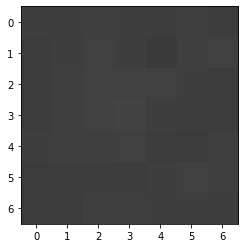

In [9]:
img = features[3506]
plt.imshow(img.reshape((7,7)), cmap = 'gray', vmin=0, vmax=1)

#### One variation of the algorithm is to look for 4 pixels anywhere in area1 which have an average brightness which deviates the most from the average of the last ring of the kernel or area2.
#### If any pixel located in area2 exceeds the avg of area2 without counting that pixel by a certain margin, ignore it and set it equal to the avg of area2
#### If the threshold is adjusted to catch all the true sats then all the false positives can be filtered (in the dataset images) by integrating the expected motion of the GEOsats from frame to frame

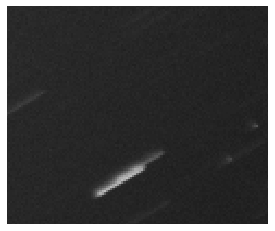

In [10]:
example_image=read_image(path3)
plt.figure()
plt.imshow(example_image, cmap = 'gray', vmin=0, vmax=1)
plt.axis('off')
plt.xlim(500,620)
plt.ylim(100,200)
plt.savefig('img2.png',bbox_inches='tight', dpi=50)

In [11]:
path4 = 'C:/Users/sincl/OneDrive/Desktop/Cranfield University/spotGEO project/Dataset/Latest work/img2.png'
img2 = read_image(path4)

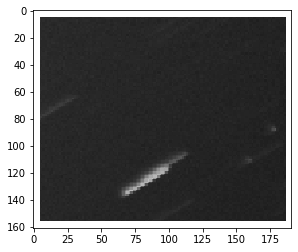

In [12]:
plt.imshow(img2)

In [13]:
print(img2.shape)

(161, 191, 4)


In [14]:
print(img2[0][0])

[1. 1. 1. 1.]


In [15]:
img2 = img2.tolist()

In [16]:
for i in range(len(img2)):
    for j in range(len(img2[0])):
        img2[i][j] = sum(img2[i][j])/len(img2[i][j])
        if img2[i][j] == 1:
            img2[i][j] = 0.373

In [17]:
img2 = np.asarray(img2)

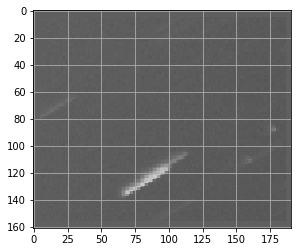

In [18]:
plt.imshow(img2, cmap = 'gray', vmin=0, vmax=1)
plt.grid()

In [19]:
print(img2.shape)
simulated_labels = []

for i in range(25696):
    simulated_labels.append(np.random.randint(0,2))
    
simulated_labels = np.asarray(simulated_labels)

(161, 191)


In [20]:
def get_kernel(img):
    kernel = []
    for u in range(len(img)):
        for t in range(len(img[0])):
            if u > 7 and u < 154 and t > 7 and t < 184:
                kernel.append(list(itertools.chain([img[u-3][t-3:t+4],img[u-2][t-3:t+4],img[u-1][t-3:t+4],img[u][t-3:t+4],img[u+1][t-3:t+4],img[u+2][t-3:t+4],img[u+3][t-3:t+4]])))
        
    return np.asarray(kernel)

In [21]:
img_features = get_kernel(img2)

In [22]:
print(len(img_features))
print(len(simulated_labels))

25696
25696


In [23]:
results2 = []
threshold = 0.08
ID = 0
ID2 = 3

results2.append(Brightness_analysis.classify(get_kernel(img2),simulated_labels,ID,ID2,threshold))

Analysing training dataset...


In [24]:
# a = 0
# b = 0
# H = []

# for i in range(len(results2[0][0])):
#     if results2[0][0][i] == 1:
#         H.append([i])
#         a+=1
# #         print(results2[0][1][i])
#     elif results2[0][0][i] == 0:
#         b+=1
# # print(a,b)
# # print(H)

In [25]:
x_axis = []
x = -1
for i in range(len(results[1])):
    x+=1
    x_axis.append(x)

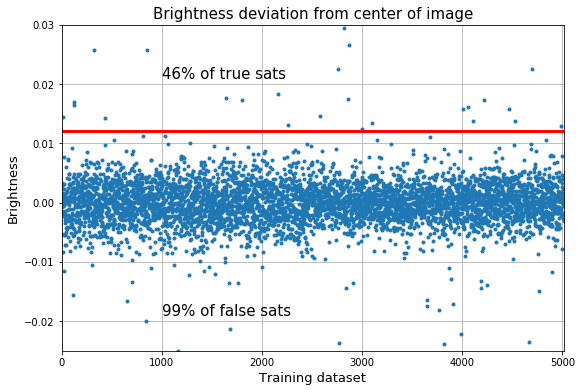

In [41]:
plt.figure(figsize=(9,6))
plt.plot(x_axis,results[1],'.')
plt.title('Brightness deviation from center of image',fontsize=15)
plt.ylabel('Brightness',fontsize=13)
plt.xlabel('Training dataset',fontsize=13)
plt.text(1000, -0.019, '99% of false sats', fontsize=15)
plt.text(1000, 0.021, '46% of true sats', fontsize=15)
plt.axhline(0.012, linewidth=3, color='r')
plt.ylim(-0.025,0.03)
plt.grid()
plt.margins(0,0)
plt.savefig('threshold.png',bbox_inches='tight', dpi=150)

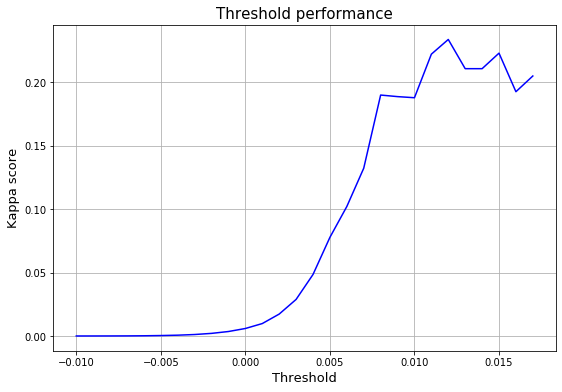

In [9]:
plt.figure(figsize=(9,6))
plt.plot(threshold_graph,kappa_score,'-b')
plt.ylabel('Kappa score',fontsize=13)
plt.xlabel('Threshold',fontsize=13)
plt.title('Threshold performance',fontsize=15)
plt.grid()
plt.savefig('threshold_performance.png',bbox_inches='tight', dpi=150)

In [ ]:
print(label)

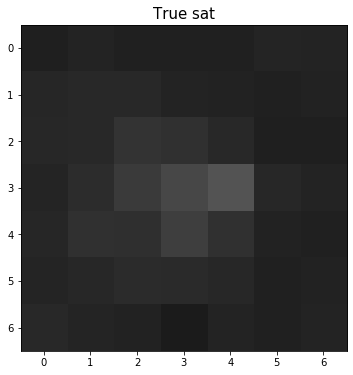

In [36]:
plt.figure(figsize=(6,6))
plt.imshow(features[0].reshape(7,7),cmap='gray',vmin=0, vmax=1)
plt.title('True sat',fontsize=15)
plt.savefig('True_sat.png',bbox_inches='tight', dpi=150)

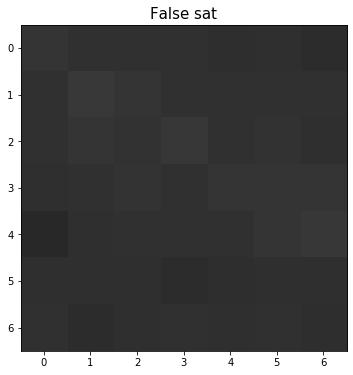

In [37]:
plt.figure(figsize=(6,6))
plt.imshow(features[5].reshape(7,7),cmap='gray',vmin=0, vmax=1)
plt.title('False sat',fontsize=15)
plt.savefig('False_sat.png',bbox_inches='tight', dpi=150)